### HR аналитика

#### Задача первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника компании на основе данных заказчика. 

#### Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


Предсказание уровня удовлетворённости сотрудника

Для этой задачи заказчик предоставил данные с признаками:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

####  Загрузка данных


In [5]:
!pip install phik -q
!pip install -U scikit-learn -q

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
import phik
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_job_satisfaction_rate=pd.read_csv('train_job_satisfaction_rate.csv')
X_test=pd.read_csv('test_features.csv')
y_test=pd.read_csv('test_target_job_satisfaction_rate.csv')

merged_test = pd.merge(X_test, y_test, on='id')

In [8]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [9]:
merged_test.info()
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  --

In [10]:
display(merged_test.head())
display(train_job_satisfaction_rate.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


#### Вывод 

- данные загружены
- типы данных определены верно 

#### Предобработка данных

In [58]:
# Добавим функцию, которая выводит количество и процент пропусков данных
def print_nans_info(df):
    nans_info = pd.DataFrame()
    nans_info['count'] = df.isnull().sum()
    nans_info['percent'] = (nans_info['count'] / df.shape[0] * 100).round(2)
    nans_info = nans_info.sort_values(by='count', ascending=False)
    display(nans_info)

In [59]:
print_nans_info(merged_test)

,count,percent
dept,2,0.10
level,1,0.05
id,0,0.00
workload,0,0.00
employment_years,0,0.00
last_year_promo,0,0.00
last_year_violations,0,0.00
supervisor_evaluation,0,0.00
salary,0,0.00
job_satisfaction_rate,0,0.00


In [13]:
print_nans_info(train_job_satisfaction_rate)

,count,percent
dept,6,0.15
level,4,0.10
id,0,0.00
workload,0,0.00
employment_years,0,0.00
last_year_promo,0,0.00
last_year_violations,0,0.00
supervisor_evaluation,0,0.00
salary,0,0.00
job_satisfaction_rate,0,0.00


In [14]:
unique_dept = train_job_satisfaction_rate['dept'].unique()
print(unique_dept)

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]


#### Ячейки со значение nan и пустая строка скорее всего одно и то же. Поэтому заменим nan на пустые строки

#### Расмотрим пропуски столбца level

In [15]:
unique_level = train_job_satisfaction_rate['level'].unique()
print(unique_level)

['junior' 'middle' 'sinior' nan]


#### Построим диаграмму ЗП от должности

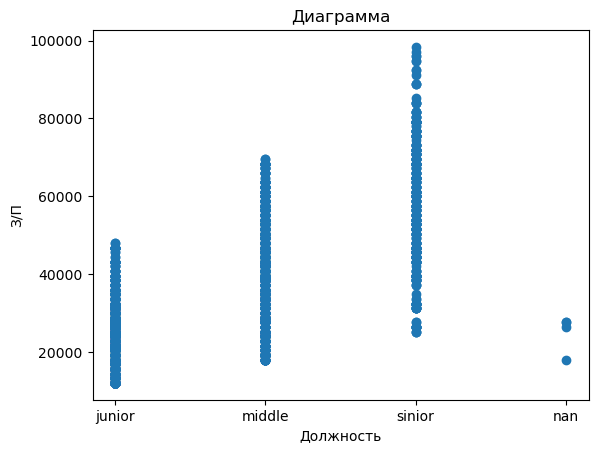

In [16]:
# Построение
plt.scatter(train_job_satisfaction_rate['level'].astype(str), train_job_satisfaction_rate['salary'])
plt.xlabel('Должность')
plt.ylabel('З/П')
plt.title('Диаграмма')
plt.show()

#### Заполним наиболее часто встречающимся в колонке значением. Заполнение будет проводиться в пайплайне ниже 

#### Исследовательский анализ данных

#### Проверим для начала данные на дубликаты

In [17]:
print(train_job_satisfaction_rate.duplicated().sum())
print('--------------')
print(merged_test.duplicated().sum())
print('--------------')

0
--------------
0
--------------


In [18]:
# Функция построения гистограмм с нанесенной медианой и средним
def hist_visio(df_ser, names, y_lim, bins):
    bins = bins # создаем массив бинов, где каждый бин - это целое число от 0 до максимального значения в датафрейме
    plt.hist(df_ser, bins=bins) # строим гистограмму
    plt.title(names[0], fontsize=16)
    plt.xlabel(names[1], fontsize=16)
    plt.ylabel(names[2], fontsize=16)
    median = df_ser.median()
    mean = df_ser.mean()
    plt.axvline(median, color='red', linestyle='-')
    plt.axvline(mean, color='green', linestyle='-')
    plt.ylim(y_lim[0], y_lim[1])
    plt.xlim(min(df_ser), max(df_ser))
    plt.legend(['Медиана', 'Среднее'], loc='upper left')
    plt.show()

In [19]:
# функция построения boxplot
def boxplot_painting(df, column_list):
    for column in column_list:
        df.boxplot(column=column)
        plt.title('Ящик с усами '+ column, fontsize=16)
        plt.show()

#### Рассмотрим отдельно тестовую и обучающую выборки

#### Тестовая выборка

In [20]:
num_columns=train_job_satisfaction_rate.select_dtypes(include=[np.number]).columns
ohe_columns=train_job_satisfaction_rate.select_dtypes(include=['object']).columns

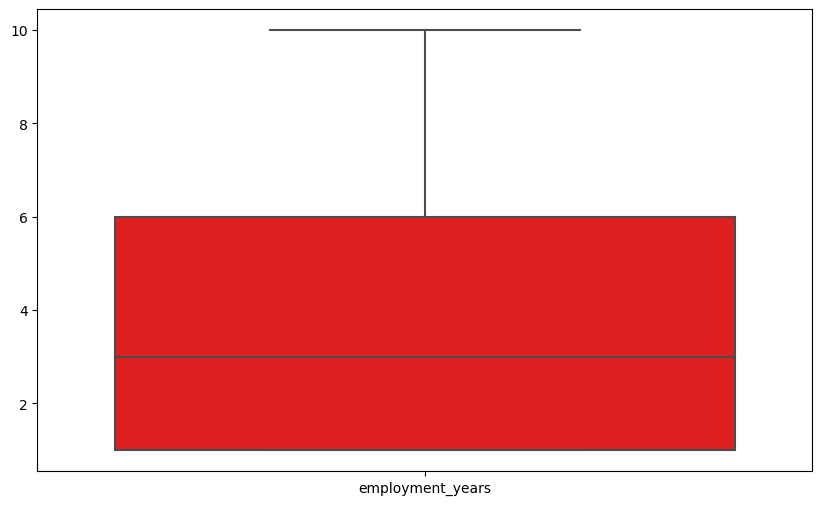

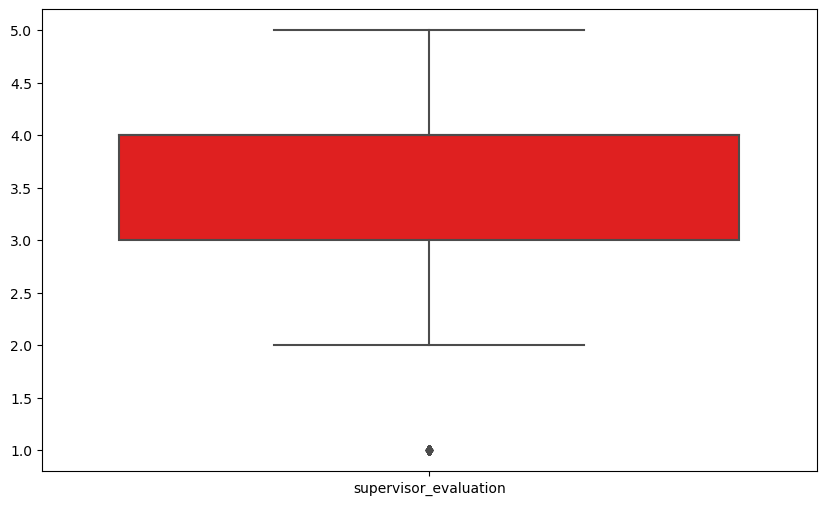

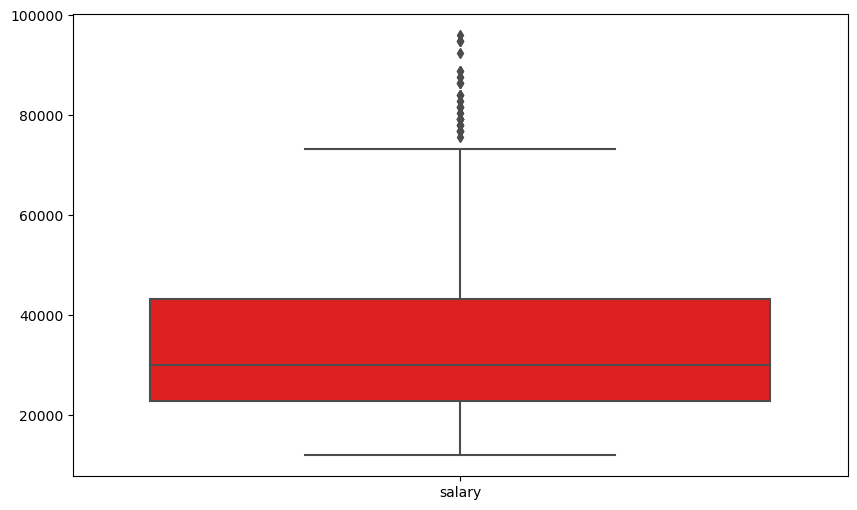

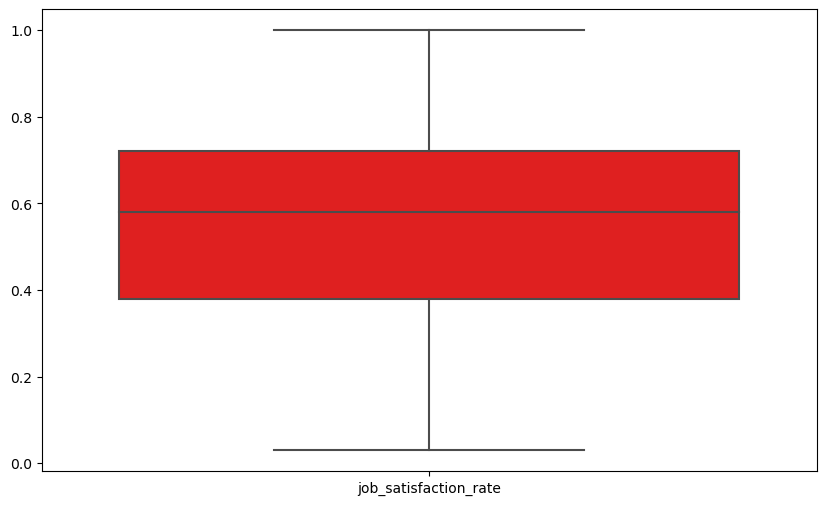

In [21]:
for i in range(1, len(num_columns)):
    test_show=merged_test.loc[:, [num_columns[i]]].copy()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=test_show, color='red', ax=ax)

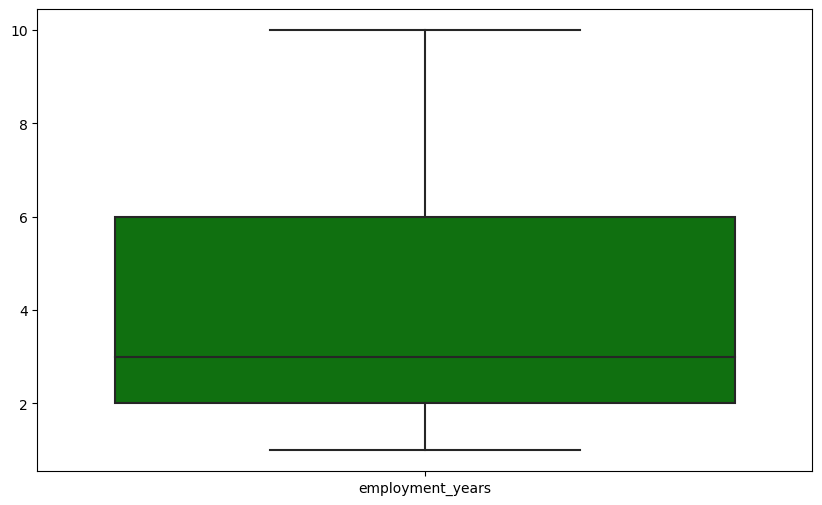

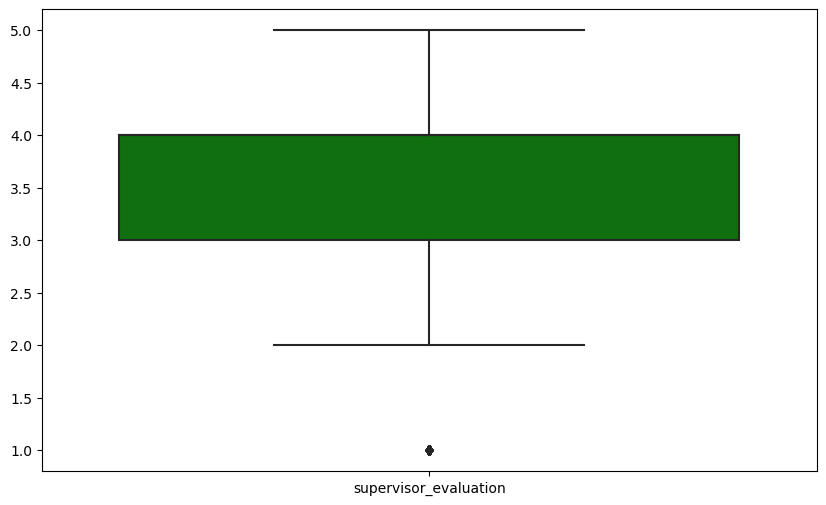

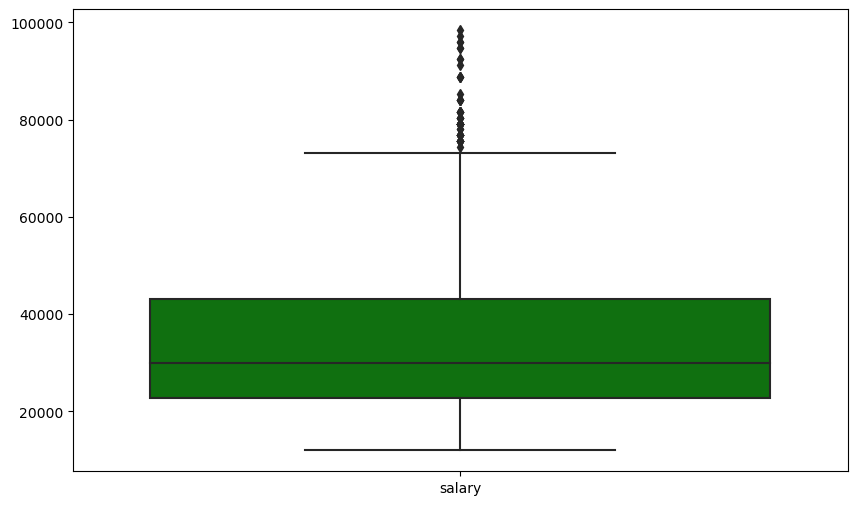

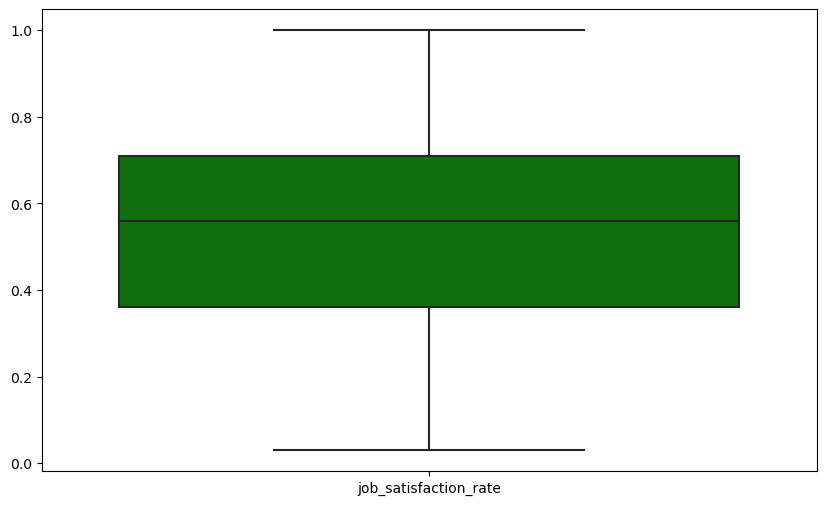

In [22]:
# построим boxplot для числовых признаков
#boxplot_painting(train_job_satisfaction_rate, num_columns)
for i in range(1, len(num_columns)):
    train_show=train_job_satisfaction_rate.loc[:, [num_columns[i]]].copy()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=train_show, color='green', ax=ax)

#### Вывод:
- Числовые признаки похожи

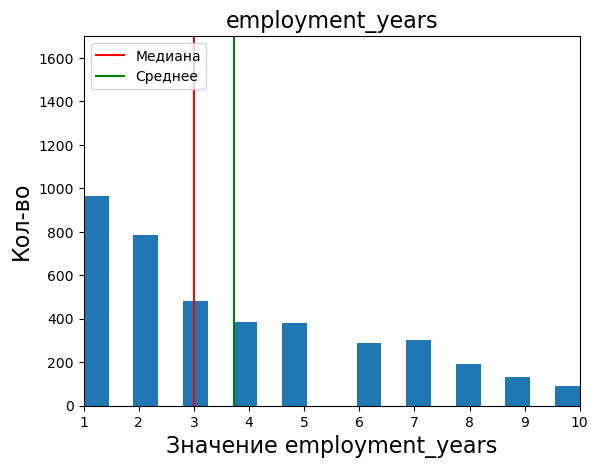

In [23]:
# построим гистограмму employment_years
names_active_employment_years=['employment_years', 'Значение employment_years', 'Кол-во']
y_lim_active_employment_years=[0, 1700]
hist_visio(train_job_satisfaction_rate['employment_years'], names_active_employment_years, y_lim_active_employment_years, 20)

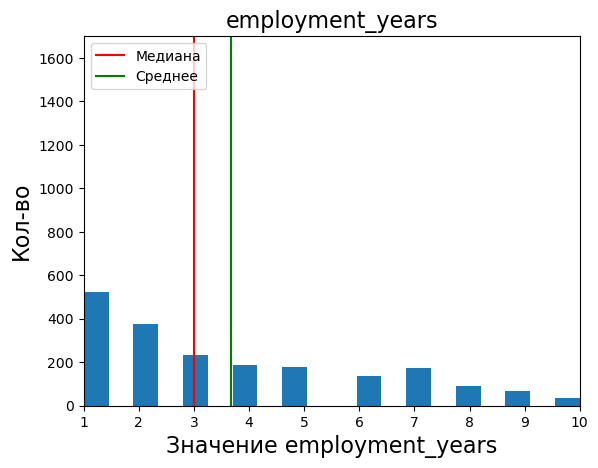

In [24]:
names_active_employment_years=['employment_years', 'Значение employment_years', 'Кол-во']
y_lim_active_employment_years=[0, 1700]
hist_visio(merged_test['employment_years'], names_active_employment_years, y_lim_active_employment_years, 20)

В среднем, люди работают в компании от 3 до 4 лет. Но многие уходят в течение первых двух лет работы. Тестовая и тренировочная выборки похожи

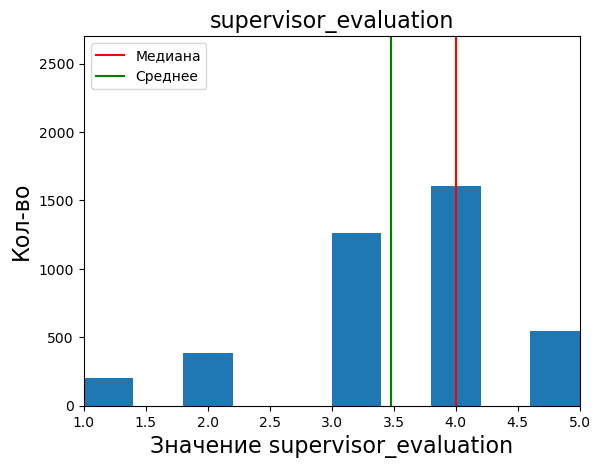

In [25]:
# построим гистограмму supervisor_evaluation
names_active_supervisor_evaluation=['supervisor_evaluation', 'Значение supervisor_evaluation', 'Кол-во']
y_lim_active_supervisor_evaluation=[0, 2700]
hist_visio(train_job_satisfaction_rate['supervisor_evaluation'], names_active_supervisor_evaluation, y_lim_active_supervisor_evaluation, 10)

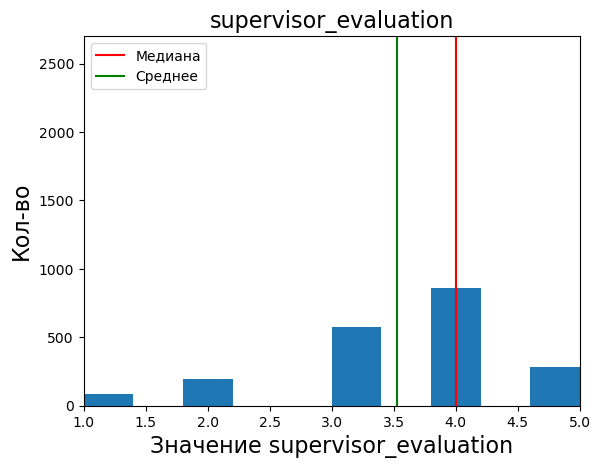

In [26]:
# построим гистограмму supervisor_evaluation
names_active_supervisor_evaluation=['supervisor_evaluation', 'Значение supervisor_evaluation', 'Кол-во']
y_lim_active_supervisor_evaluation=[0, 2700]
hist_visio(merged_test['supervisor_evaluation'], names_active_supervisor_evaluation, y_lim_active_supervisor_evaluation, 10)

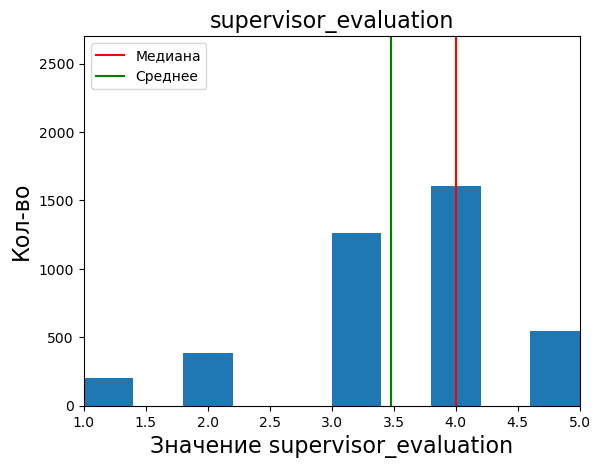

In [27]:
# построим гистограмму supervisor_evaluation
names_active_supervisor_evaluation=['supervisor_evaluation', 'Значение supervisor_evaluation', 'Кол-во']
y_lim_active_supervisor_evaluation=[0, 2700]
hist_visio(train_job_satisfaction_rate['supervisor_evaluation'], names_active_supervisor_evaluation, y_lim_active_supervisor_evaluation, 10)

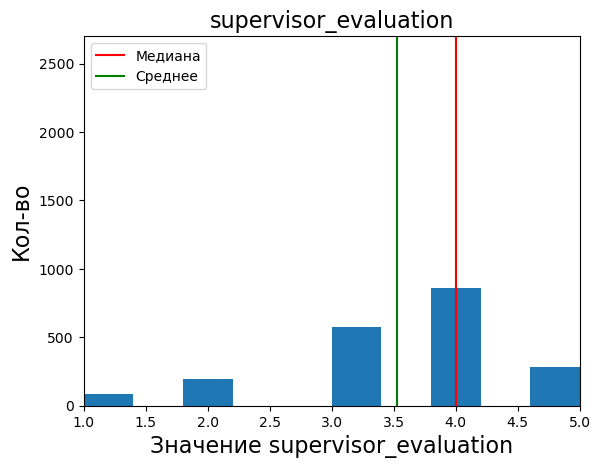

In [28]:
# построим гистограмму supervisor_evaluation
names_active_supervisor_evaluation=['supervisor_evaluation', 'Значение supervisor_evaluation', 'Кол-во']
y_lim_active_supervisor_evaluation=[0, 2700]
hist_visio(merged_test['supervisor_evaluation'], names_active_supervisor_evaluation, y_lim_active_supervisor_evaluation, 10)

Данные похожи

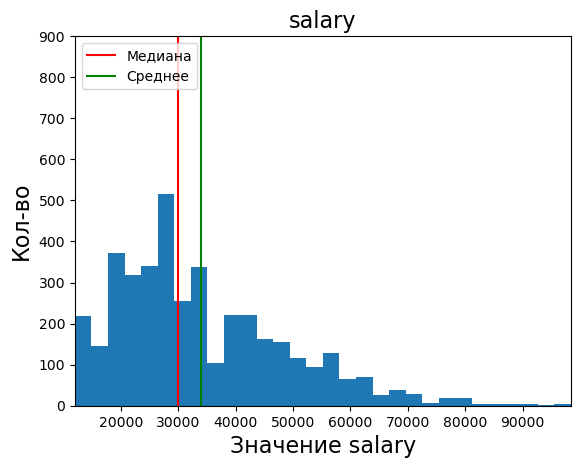

In [29]:
# построим гистограмму salary
names_active_salary=['salary', 'Значение salary', 'Кол-во']
y_lim_active_salary=[0, 900]
hist_visio(train_job_satisfaction_rate['salary'], names_active_salary, y_lim_active_salary, 30)

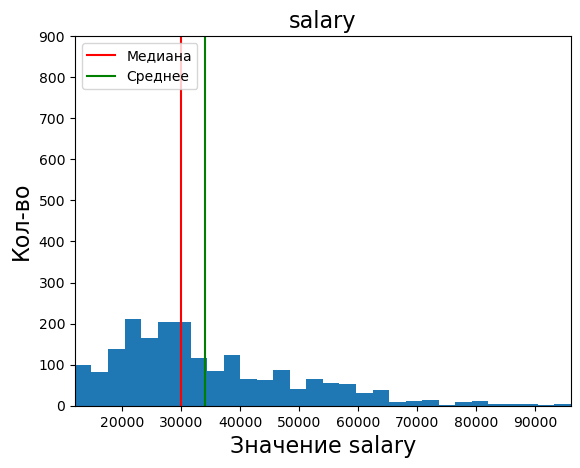

In [30]:
# построим гистограмму salary
names_active_salary=['salary', 'Значение salary', 'Кол-во']
y_lim_active_salary=[0, 900]
hist_visio(merged_test['salary'], names_active_salary, y_lim_active_salary, 30)

ЗП, конечно, так себе. Как у крепостного крестьянина 

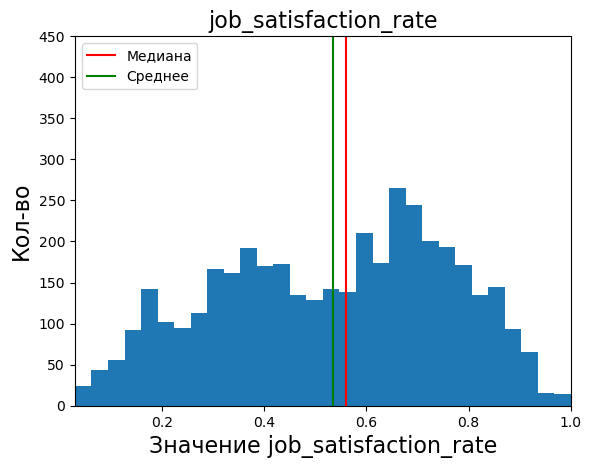

In [31]:
# построим гистограмму job_satisfaction_rate
names_active_job_satisfaction_rate=['job_satisfaction_rate', 'Значение job_satisfaction_rate', 'Кол-во']
y_lim_active_job_satisfaction_rate=[0, 450]
hist_visio(train_job_satisfaction_rate['job_satisfaction_rate'], names_active_job_satisfaction_rate, y_lim_active_job_satisfaction_rate, 30)

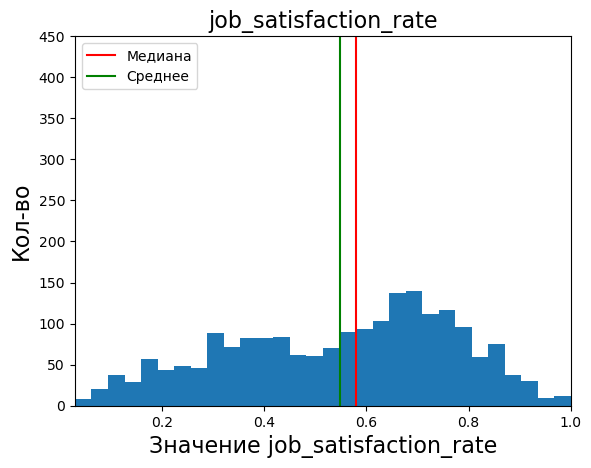

In [32]:
# построим гистограмму job_satisfaction_rate
names_active_job_satisfaction_rate=['job_satisfaction_rate', 'Значение job_satisfaction_rate', 'Кол-во']
y_lim_active_job_satisfaction_rate=[0, 450]
hist_visio(merged_test['job_satisfaction_rate'], names_active_job_satisfaction_rate, y_lim_active_job_satisfaction_rate, 30)

##### Числовые данные схожи

#### Рассмотрим категориальные признаки 

In [33]:
print(ohe_columns)

Index(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'], dtype='object')


<AxesSubplot:title={'center':'Отделы'}, xlabel='Значение', ylabel='К-во'>

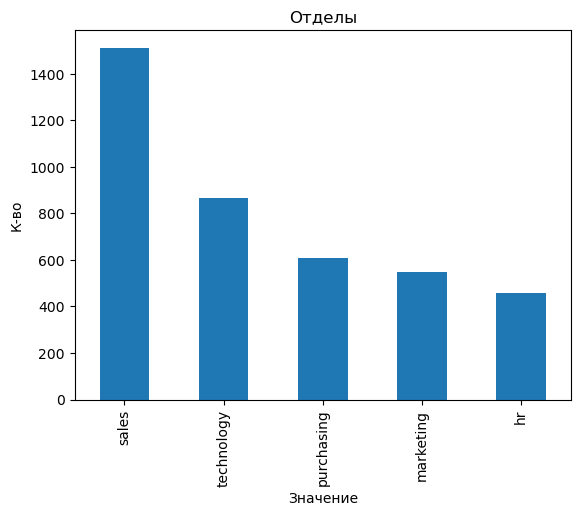

In [34]:
train_job_satisfaction_rate['dept'].value_counts().plot(kind='bar', title="Отделы",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Отделы'}, xlabel='Значение', ylabel='К-во'>

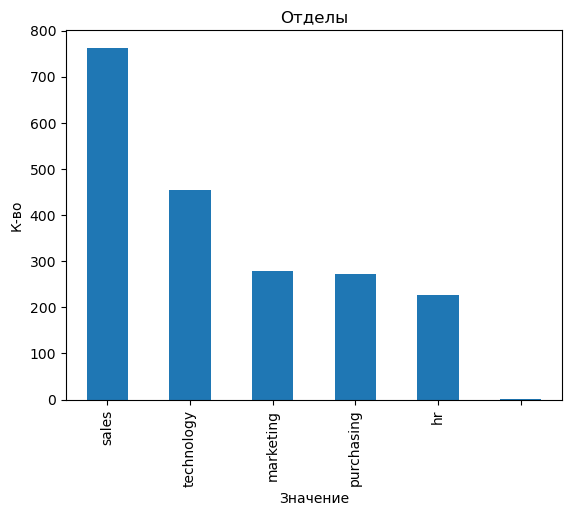

In [35]:
merged_test['dept'].value_counts().plot(kind='bar', title="Отделы",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Уровень занимаемой должности'}, xlabel='Значение', ylabel='К-во'>

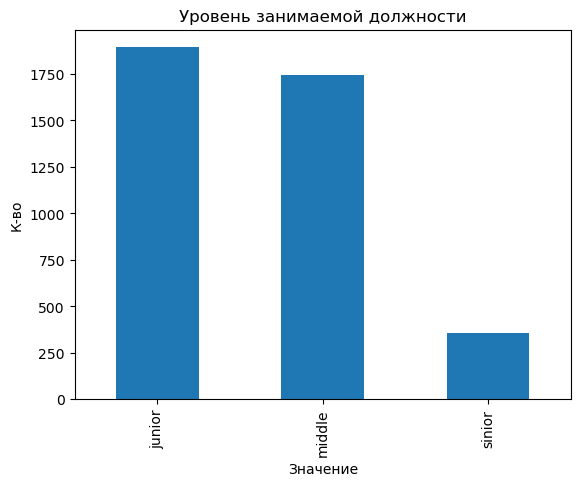

In [36]:
train_job_satisfaction_rate['level'].value_counts().plot(kind='bar', title="Уровень занимаемой должности",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Уровень занимаемой должности'}, xlabel='Значение', ylabel='К-во'>

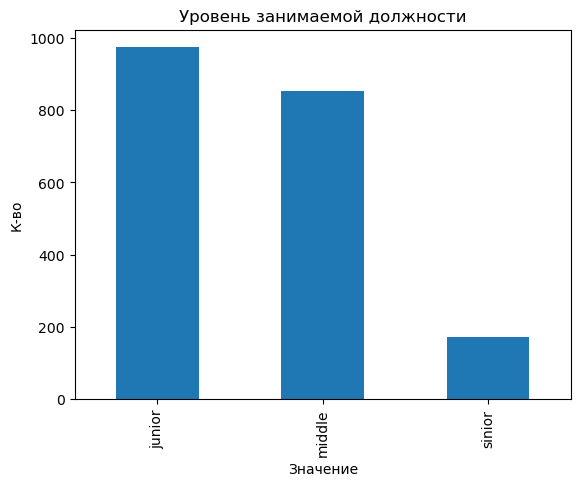

In [37]:
merged_test['level'].value_counts().plot(kind='bar', title="Уровень занимаемой должности",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Уровень загруженности сотрудника'}, xlabel='Значение', ylabel='К-во'>

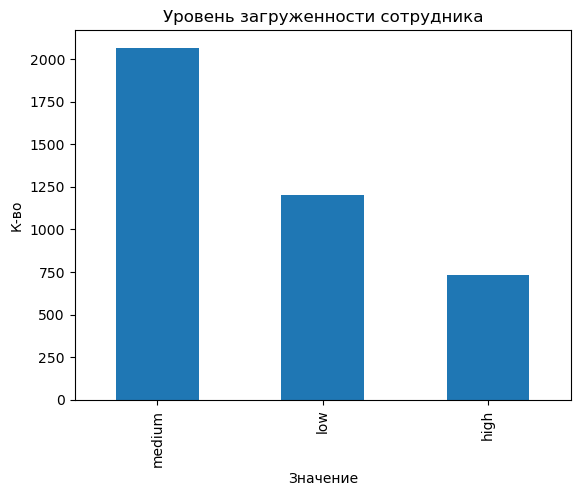

In [38]:
train_job_satisfaction_rate['workload'].value_counts().plot(kind='bar', title="Уровень загруженности сотрудника",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Уровень загруженности сотрудника'}, xlabel='Значение', ylabel='К-во'>

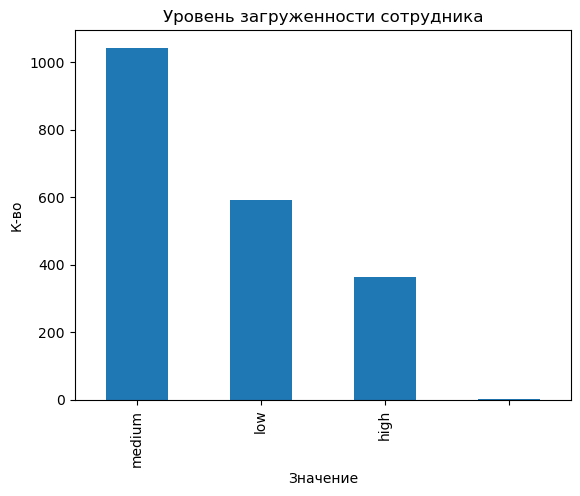

In [39]:
merged_test['workload'].value_counts().plot(kind='bar', title="Уровень загруженности сотрудника",xlabel="Значение", ylabel="К-во")

#### Есть сотрудники без загруженности. Проверим сколько их

In [40]:
print(merged_test['workload'].unique())
merged_test[merged_test['workload']==' '].count()

['medium' 'low' 'high' ' ']


id                       1
dept                     1
level                    1
workload                 1
employment_years         1
last_year_promo          1
last_year_violations     1
supervisor_evaluation    1
salary                   1
job_satisfaction_rate    1
dtype: int64

#### Без указания загруженности всего один сотрудник. Возможно это сотрудник в отпуске, но это не точно. Поэтому удалим его

In [41]:
merged_test[merged_test['workload']==' ']['id']

15    590867
Name: id, dtype: int64

In [42]:
if not merged_test.loc[merged_test['workload']==' '].empty:
    id_to_delete = int(merged_test[merged_test['workload']==' ']['id'])
    merged_test.drop(merged_test.query('id == @id_to_delete').index, inplace=True)

<AxesSubplot:title={'center':'Уровень загруженности сотрудника'}, xlabel='Значение', ylabel='К-во'>

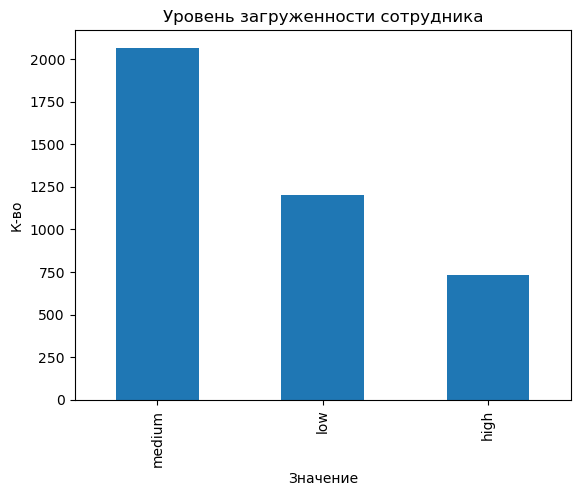

In [43]:
train_job_satisfaction_rate['workload'].value_counts().plot(kind='bar', title="Уровень загруженности сотрудника",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Уровень загруженности сотрудника'}, xlabel='Значение', ylabel='К-во'>

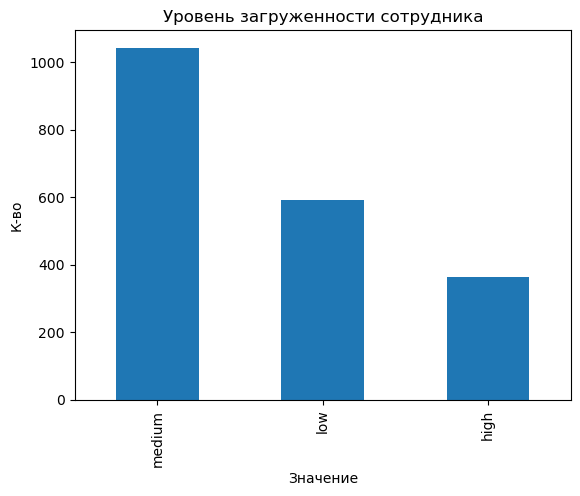

In [44]:
merged_test['workload'].value_counts().plot(kind='bar', title="Уровень загруженности сотрудника",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Повышение за последний год'}, xlabel='Значение', ylabel='К-во'>

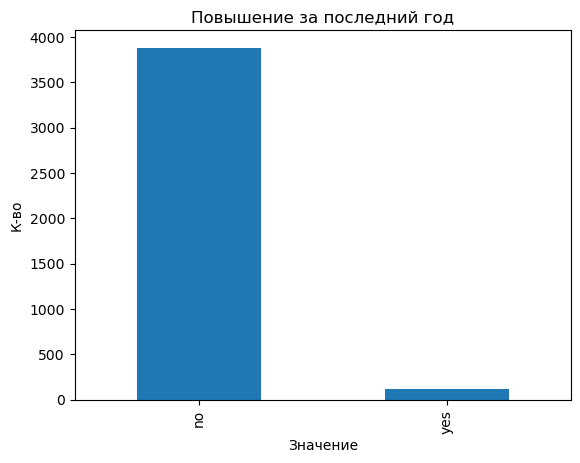

In [45]:
train_job_satisfaction_rate['last_year_promo'].value_counts().plot(kind='bar', title="Повышение за последний год",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Повышение за последний год'}, xlabel='Значение', ylabel='К-во'>

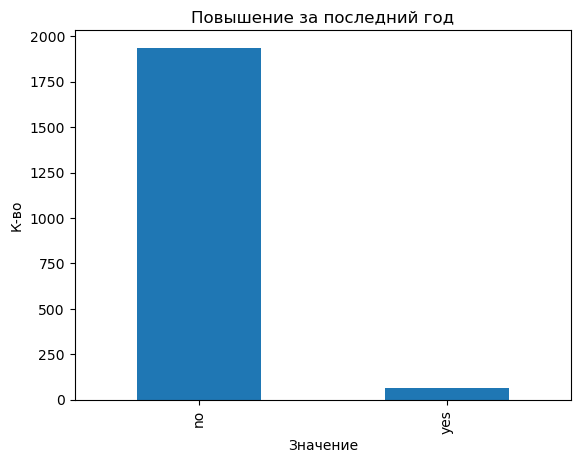

In [46]:
merged_test['last_year_promo'].value_counts().plot(kind='bar', title="Повышение за последний год",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Нарушал ли сотрудник трудовой договор'}, xlabel='Значение', ylabel='К-во'>

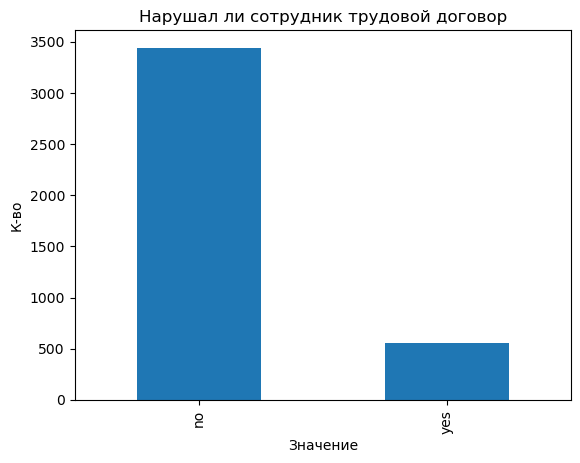

In [47]:
train_job_satisfaction_rate['last_year_violations'].value_counts().plot(kind='bar', title="Нарушал ли сотрудник трудовой договор",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Нарушал ли сотрудник трудовой договор'}, xlabel='Значение', ylabel='К-во'>

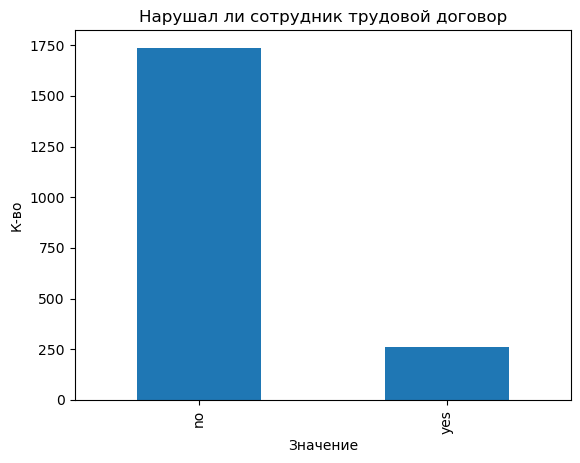

In [48]:
merged_test['last_year_violations'].value_counts().plot(kind='bar', title="Нарушал ли сотрудник трудовой договор",xlabel="Значение", ylabel="К-во")

#### Выведем матрицу корреляции

interval columns not set, guessing: ['id', 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


<AxesSubplot:>

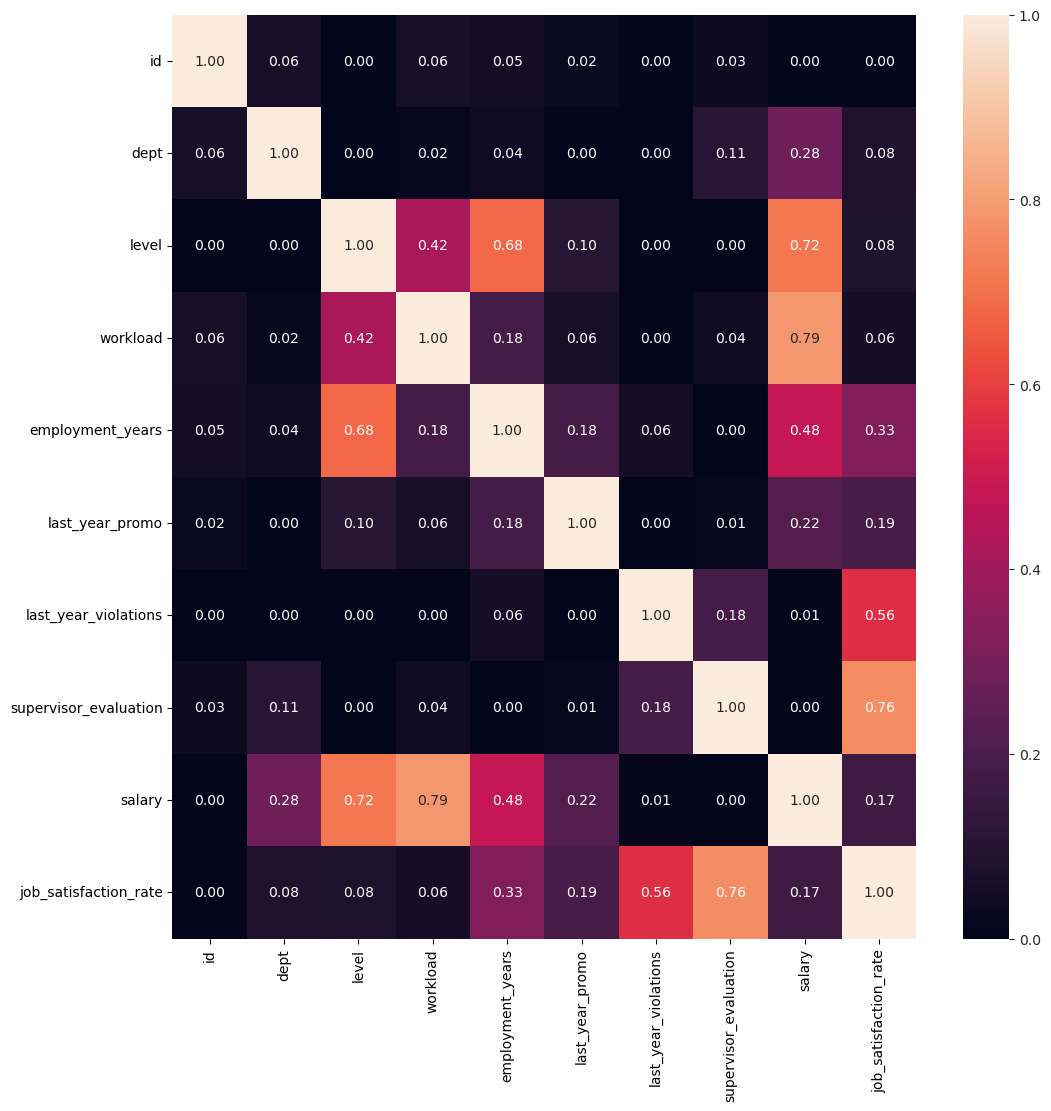

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))
# Визуализация корреляционной матрицы как тепловой карты
sns.set_style("white")
sns.heatmap(train_job_satisfaction_rate.phik_matrix(), annot=True, fmt='.2f')

#### Вывод:

- Необходимо кадировать категориальные признаки методом One-Hot Encoding
- Данные тестовой и тренировочной выборки похожи

#### В целом есть высокие значения корреляции, но мультиколлинеарных признаков нет

#### Будем строить модель как есть
    

#### Подготовка данных

In [50]:
display(X_test.head())
display(y_test.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [51]:
# сортируем данные по id
X_test.sort_values(by='id', inplace=True, ascending=True)
X_test = X_test.reset_index(drop=True)
y_test.sort_values(by='id', inplace=True, ascending=True)
y_test = y_test.reset_index(drop=True)


display(X_test.head())
display(y_test.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,100298,hr,junior,low,2,no,no,4,19200
1,100480,marketing,junior,low,4,no,no,4,16800
2,100503,purchasing,middle,high,5,no,no,4,55200
3,100610,sales,middle,medium,5,no,no,4,43200
4,100692,sales,middle,high,6,no,no,4,48000


,id,job_satisfaction_rate
0,100298,0.80
1,100480,0.84
2,100503,0.79
3,100610,0.75
4,100692,0.69


In [52]:
RANDOM_STATE = 42
TEST_SIZE = 0.3

X_train=train_job_satisfaction_rate.drop(['id'], axis=1)

print(X_train.duplicated().sum())
print('--------------')


245
--------------


In [53]:
X_train.drop_duplicates(inplace=True)
X_train = X_train.reset_index(drop=True)

In [54]:
print(X_train.duplicated().sum())
print('--------------')

0
--------------


In [55]:
y_train=X_train['job_satisfaction_rate']

X_train=X_train.drop(['job_satisfaction_rate'], axis=1)

X_train.shape, X_test.shape

((3755, 8), (2000, 9))

In [56]:
# выделим количетвенные и категориальные признаки
ohe_columns=['dept', 'last_year_promo', 'last_year_violations']
num_columns=['employment_years', 'salary', 'supervisor_evaluation']
ord_columns=['level', 'workload']
ohe_columns

['dept', 'last_year_promo', 'last_year_violations']

In [61]:
# Соберем pipeline для заполнения пропусков
pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])



#создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium' , 'high']
                    
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

##### Обучение моделей

Выбор делается на основе метрики — SMAPE (symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 


In [62]:
def smape(y_true, y_pred):
    sMAPE = (sum(abs(y_true-y_pred)/((abs(y_true)+abs(y_pred))/2))/len(y_true))*100
    return sMAPE
 
    
# создаём объект пользовательской метрики
smape_scorer = make_scorer(smape, greater_is_better=False)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)


param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 12),
        'models__max_features': range(1,12),
        # указываем список методов масштабирования  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LinearRegression()], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
        
    }
   
]


grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid,
    cv=5, 
    scoring=smape_scorer, 
    n_jobs=-1
)
grid.fit(X_train, y_train) 


print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

In [63]:
result = pd.DataFrame(grid.cv_results_)
with pd.option_context('max_colwidth', 3000):
    display(result[['rank_test_score', 'param_models', 'mean_test_score','params']]
            .sort_values('rank_test_score').head())

,rank_test_score,param_models,mean_test_score,params
361,1,DecisionTreeRegressor(random_state=42),-15.959593,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 11, 'models__max_features': 11, 'preprocessor__num': MinMaxScaler()}"
360,2,DecisionTreeRegressor(random_state=42),-15.964920,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 11, 'models__max_features': 11, 'preprocessor__num': StandardScaler()}"
362,3,DecisionTreeRegressor(random_state=42),-15.979396,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 11, 'models__max_features': 11, 'preprocessor__num': 'passthrough'}"
348,4,DecisionTreeRegressor(random_state=42),-16.032808,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 11, 'models__max_features': 7, 'preprocessor__num': StandardScaler()}"
350,5,DecisionTreeRegressor(random_state=42),-16.063752,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 11, 'models__max_features': 7, 'preprocessor__num': 'passthrough'}"


In [64]:
probabilities = grid.predict(X_test)
print('y_test SMAPE:', smape(y_test['job_satisfaction_rate'], probabilities))

y_test SMAPE: 14.732116313404218


####  Оформление выводов


#### Выводы:

    Лучше всего справилась DecisionTreeRegressor(max_depth=11, max_features=10, random_state=42)), потому что в данных было много нелинейных признаков. Деревья решений подстраиваются к данным и хороши для нелинейных зависимостей
    
    

#### Предсказание увольнения сотрудника из компании

#### Загрузка данных

In [67]:
train_quit=pd.read_csv('train_quit.csv')
test_features=pd.read_csv('test_features.csv')
test_target_quit=pd.read_csv('test_target_quit.csv')

merged_test_quit = pd.merge(test_features, test_target_quit, on='id')
merged_test_quit = merged_test_quit.sort_values(by='id', ascending=True)
merged_test_quit = merged_test_quit.reset_index(drop=True)
merged_test_quit['job_satisfaction_rate']=probabilities

merged_train_quit = train_quit.sort_values(by='id', ascending=True)
merged_train_quit = train_quit.reset_index(drop=True)

probabilities_1 = grid.predict(merged_train_quit)

merged_train_quit['job_satisfaction_rate']=probabilities_1

In [68]:
display(merged_test_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,100298,hr,junior,low,2,no,no,4,19200,no,0.831395
1,100480,marketing,junior,low,4,no,no,4,16800,no,0.831395
2,100503,purchasing,middle,high,5,no,no,4,55200,no,0.804444
3,100610,sales,middle,medium,5,no,no,4,43200,no,0.825556
4,100692,sales,middle,high,6,no,no,4,48000,no,0.674412
...,...,...,...,...,...,...,...,...,...,...,...
1995,997290,sales,sinior,medium,7,no,no,4,58800,no,0.775574
1996,998548,marketing,junior,medium,2,no,no,4,32400,yes,0.793333
1997,998762,technology,junior,low,3,no,no,3,22800,yes,0.486667
1998,998900,marketing,middle,medium,7,no,no,3,45600,no,0.420930


In [69]:
display(merged_train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.638070
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.839155
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.369167
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.797857
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.525385
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.804444
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.520000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.493704


#### Исследовательский анализ данных

In [70]:
# Проверим дубликаты
print(merged_train_quit.duplicated().sum())
print('--------------')

# Проверим дубликаты
print(merged_test_quit.duplicated().sum())
print('--------------')

0
--------------
0
--------------


In [71]:
merged_train_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit', 'job_satisfaction_rate'],
      dtype='object')

In [72]:
# выделим количетвенные и категориальные признаки
ohe_columns_quit=['dept', 'last_year_promo', 'last_year_violations']
num_columns_quit=['employment_years', 'salary', 'supervisor_evaluation']
ord_columns_quit=['level', 'workload']

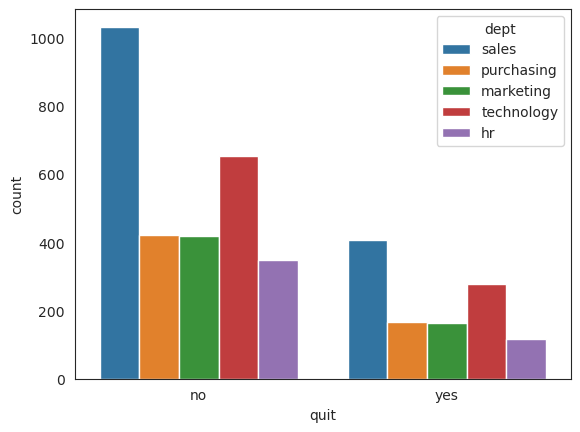

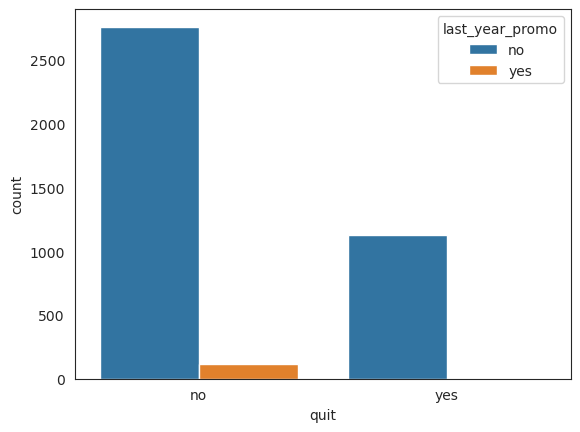

In [73]:
for i in range(0,2):
    sns.countplot(x = 'quit', hue = ohe_columns_quit[i], data = merged_train_quit)
    plt.show()

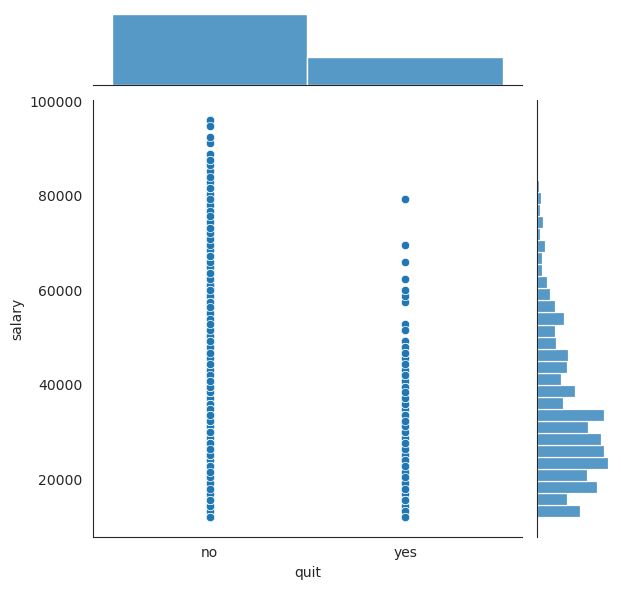

In [74]:
#sns.scatterplot(x=data_quit['quit'], y=data_quit['salary'])

for value in range(1,2):
    sns.jointplot(x=train_quit['quit'], y=train_quit[num_columns_quit[value]], data=merged_train_quit)

#### Часто увольняются: 
- junior сотрудники,
- те кому не повышали ЗП
- со средней и высокой загруженностью
- из отдела продаж
- с ЗП чуть выше 20 тыс
- с оценкой качества работы от 3 до 4
- работающих менее 2-х лет

In [75]:
merged_train_quit.info() 

merged_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   quit                   4000 non-null   object 
 10  job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dt

interval columns not set, guessing: ['id', 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


<AxesSubplot:>

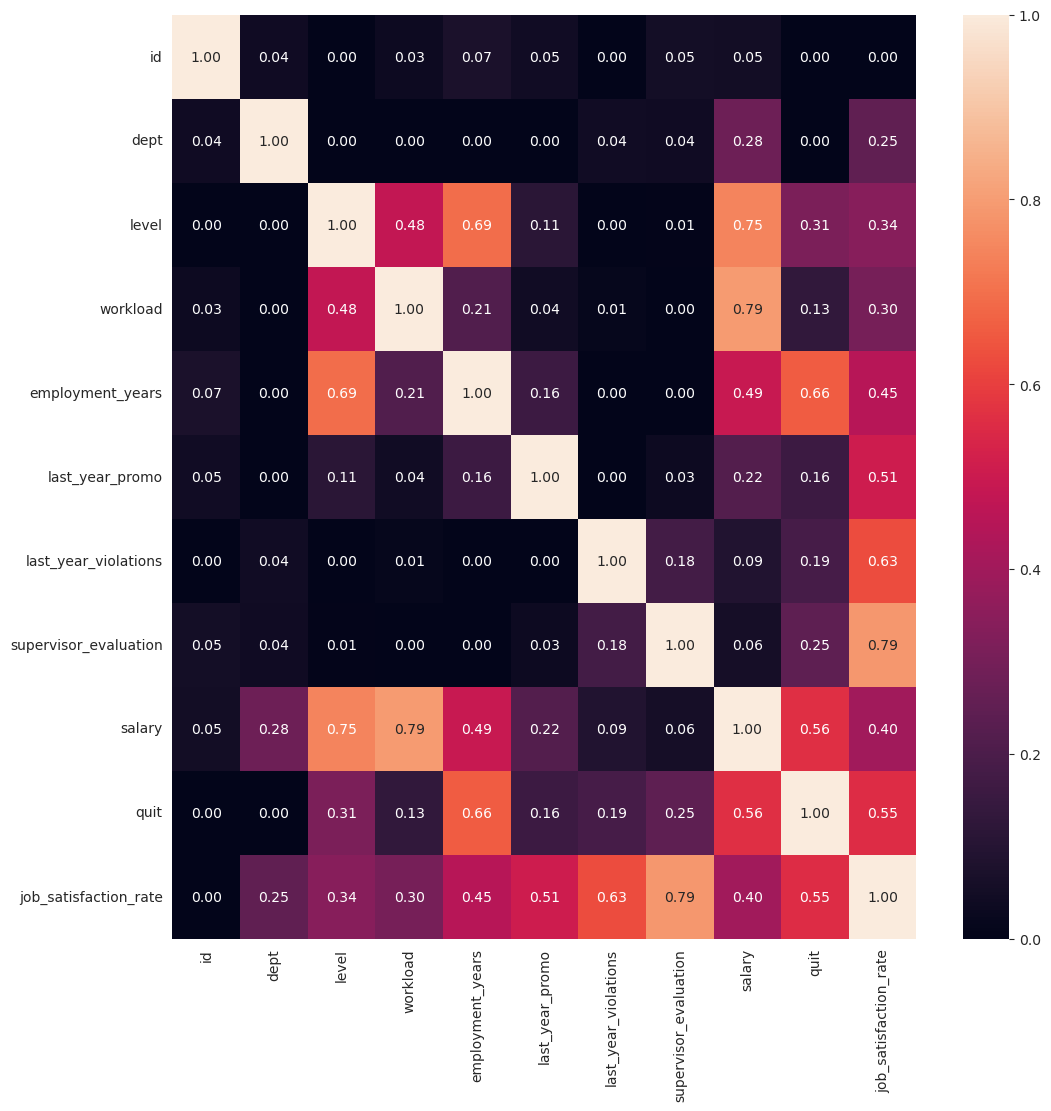

In [76]:
#df_full.drop('id', axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(12, 12))
# Визуализация корреляционной матрицы как тепловой карты
sns.set_style("white")
sns.heatmap(merged_train_quit.phik_matrix() , annot=True, fmt='.2f')

#### Действительно уровень удовлетворённости сотрудника работой имеет линейную связь с тем, что сотрудник может уволиться

#### Добавление нового входного признака

#### Подготовка данных

In [77]:
X_train=merged_train_quit.drop(['id'], axis=1)
X_test=merged_test_quit.drop(['id'], axis=1)

print(X_train.duplicated().sum())
print('--------------')

1413
--------------


In [78]:
X_train.drop_duplicates(inplace=True)
X_train = X_train.reset_index(drop=True)

In [79]:
print(X_train.duplicated().sum())
print('--------------')

0
--------------


In [80]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

y_train=X_train['quit']
y_test=X_test['quit']
X_train=X_train.drop(['quit'], axis=1)
X_test=X_test.drop(['quit'], axis=1)


In [ ]:
#создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )    
        
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium' , 'high']
                    
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [81]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 6),
        'models__max_features': range(1,6),
        # указываем список методов масштабирования  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C':  [1, 10, 100, 1000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


#### Обучение модели

Метрика оценки качества в этой задаче — ROC-AUC. 
Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.

In [82]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных

labelencoder = LabelEncoder()

# Преобразование целевого признака
y_test_encoded = labelencoder.fit_transform(y_test)


#y_test_pred = randomized_search.predict_proba(X_test)
#y_test_pred_encoder=labelencoder.fit_transform(y_test_pred[:, 1])


probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test_encoded, probabilities_one))


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

In [83]:
result_1 = pd.DataFrame(randomized_search.cv_results_)
with pd.option_context('max_colwidth', 3000):
    display(result_1[['rank_test_score', 'param_models', 'mean_test_score','params']]
            .sort_values('rank_test_score').head())

,rank_test_score,param_models,mean_test_score,params
6,1,DecisionTreeClassifier(random_state=42),0.904115,"{'preprocessor__num': StandardScaler(), 'models__max_features': 4, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
7,2,"LogisticRegression(penalty='l1', random_state=42, solver='liblinear')",0.902852,"{'preprocessor__num': StandardScaler(), 'models__C': 4, 'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear')}"
8,3,"LogisticRegression(penalty='l1', random_state=42, solver='liblinear')",0.902836,"{'preprocessor__num': MinMaxScaler(), 'models__C': 5, 'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear')}"
5,4,KNeighborsClassifier(),0.892686,"{'preprocessor__num': MinMaxScaler(), 'models__n_neighbors': 14, 'models': KNeighborsClassifier()}"
0,5,KNeighborsClassifier(),0.882322,"{'preprocessor__num': 'passthrough', 'models__n_neighbors': 7, 'models': KNeighborsClassifier()}"


#### Выводы

#### Выводы:

    Лучше всего справилась DecisionTreeRegressor(max_depth=11, max_features=10, random_state=42)), потому что в данных было много нелинейных признаков. Деревья решений подстраиваются к данным и хороши для нелинейных зависимостей

#### Общий вывод:
   
   Решалась задача регрессии, которая заключалась в предсказание уровня удовлетворённости сотрудника и задача бинарной классификации - предсказание увольнения сотрудника из компании
   
   Этапы разработки включали:
   - предобработка данных
   - исследовательский анализ
   - подготовка данных
   - обучение моделей
   
   
#### Зависимость в данных оказалась нелинейной, поэтому лучше всего справились модели, в осове которых лежали деревья решений. 

Для задачи регрессии использовалась кастом метрика SMAPE.

В процессе решения применялись пайплайны, которые позволили проводить кросс-валидацию, 
подобрать гиперпараметры модели. Поиск оптимального решения включает в себя настройку модели с помощью GridSearchCV, RandomizedSearchCV.

Рекомендую использовать данные модели для решения прикладных задач.